In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
sparse_1 = np.load("sparse_1.npz")
sparse_2 = np.load("sparse_2.npz")

In [3]:
# Print files in sparse_1
sparse_1.files

['sensor_config_dump',
 'module_key',
 'processing_config_dump',
 'rss_version',
 'lib_version',
 'timestamp',
 'mode',
 'session_info',
 'data',
 'data_info']

In [4]:
data = sparse_1['data']
data.shape

(614, 1, 32, 18)

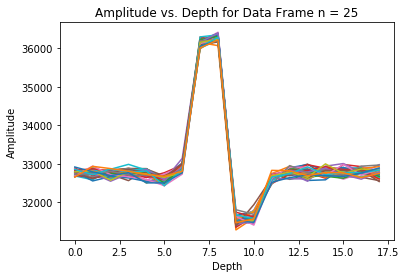

In [8]:
# Plot the n-th data frame: go through each sweep, which corresponds to the colors,
# and plot the amplitude at particular depths
n = 25
for i in range(data.shape[2]):
    plt.plot(data[n, 0, i, :])
    plt.xlabel("Depth")
    plt.ylabel("Amplitude")
    plt.title("Amplitude vs. Depth for Data Frame n = " + str(n))

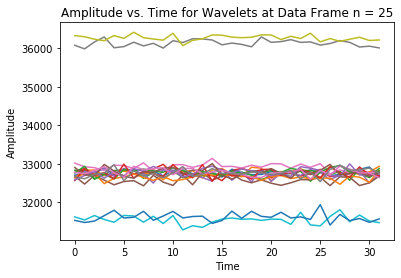

In [13]:
# Plot undersampled (due to sparse sampling) wavelets at each depth, where depths are represented by colors
n = 25
for i in range(data.shape[3]):
    plt.plot(data[n, 0, :, i])
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Amplitude vs. Time for Wavelets at Data Frame n = " + str(n))

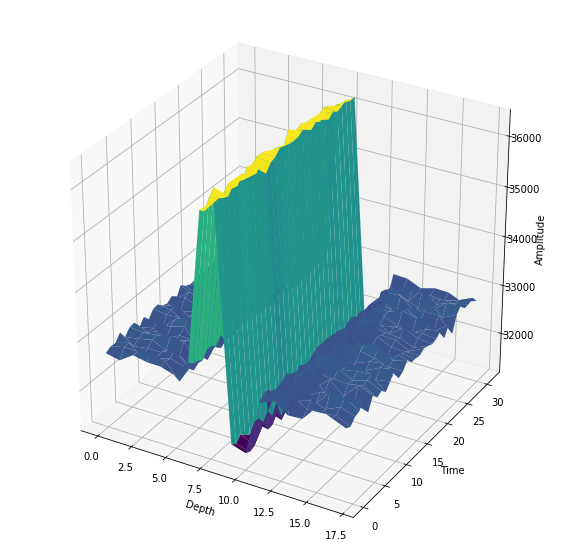

In [34]:
# 3D Plot of the above 2 plots
n = 25
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create X and Y Axes
X = np.arange(0, 18) # Depths    TODO: Figure out units / correct values
Y = np.arange(0, 32) # Times     TODO: Figure out units / correct values
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, data[n, 0, :, :],cmap='viridis', edgecolor='none')

ax.set_xlabel('Depth')
ax.set_ylabel('Time')
ax.set_zlabel('Amplitude')
fig.set_size_inches(10, 10)

plt.show()